<a href="https://colab.research.google.com/github/CaioEnzo23/Previsao-de-encerramento-de-Streaming/blob/main/Desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

Instalação de Bibliotecas

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install pandas-profiling
!pip install sidetable
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=27227c04dabd487b9a519011b4e2bb02674aaf4d7c40640fb42ab7e31f60b057
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00


Importação das principais bilbiotecas ultilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.datasets import load_wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#**Análise exploratória dos dados (Data Understanding)**

Importação de Dados

In [ ]:
df = pd.read_excel("/content/streaming_data.xlsx")

Realize uma descrição estatística dos dados

In [ ]:
descricao = df.describe()
print(descricao)

                Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120700             1.413235      1.154963      0.428938  
min                  1.000000             1.000000      1.000000      0.000000  
25%                  1.000000             2.000000    

 Verifique os tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


Verifique a quantidade de valores faltantes

In [ ]:
df.isna()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77879,False,False,True,True,False,True,False,False,False,False
77880,False,False,False,True,False,True,False,False,False,False
77881,False,False,True,False,False,True,False,False,False,False
77882,False,False,False,False,False,True,False,True,False,False


In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

#**Tratamento dos Dados (Data Preparation)**

Substituir valores “NaN” por 0 Colunas → Time_on_platform,
Num_streaming_services, Churned, Avg_rating, Devices_connected

In [ ]:
colunas = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas] = df[colunas].fillna(0)

print(df)

        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
3      26.0    Male               0.0                5.0             Basic   
4      18.0     NaN            1948.0                3.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               0.0                0.0             Basic   
77880  47.0  Female            6176.0                0.0           Premium   
77881  64.0  Female               0.0                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating 

Dropar linhas nulas nas colunas Gender, Subscription_type e Age

In [ ]:
colunas = ['Gender', 'Subscription_type', 'Age']
df_limpo = df.dropna(subset=colunas)

print(df_limpo)

        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
3      26.0    Male               0.0                5.0             Basic   
5      54.0    Male            3024.0                2.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               0.0                0.0             Basic   
77880  47.0  Female            6176.0                0.0           Premium   
77881  64.0  Female               0.0                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating 

Transformando valores churned 0 e 1 por No e Yes

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

print(df)

        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
3      26.0    Male               0.0                5.0             Basic   
4      18.0     NaN            1948.0                3.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               0.0                0.0             Basic   
77880  47.0  Female            6176.0                0.0           Premium   
77881  64.0  Female               0.0                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating 

Transformando valores floats em valores inteiros

In [ ]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [ ]:
df.fillna({'Devices_connected': 0, 'Age': 0, 'Time_on_platform': 0,
           'Num_streaming_services': 0, 'Avg_rating': 0}, inplace=True)

In [ ]:
df = df.astype({'Devices_connected': 'int', 'Age': 'int', 'Time_on_platform': 'int',
                'Num_streaming_services': 'int', 'Avg_rating': 'int'})

print(df)

       Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0       49    Male              4700                  3             Basic   
1       69  Female              6107                  2          Standard   
2       44    Male              6374                  3           Premium   
3       26    Male                 0                  5             Basic   
4       18     NaN              1948                  3             Basic   
...    ...     ...               ...                ...               ...   
77879   45    Male                 0                  0             Basic   
77880   47  Female              6176                  0           Premium   
77881   64  Female                 0                  5           Premium   
77882   58    Male              1314                  5          Standard   
77883   68  Female              7078                  1          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating Churned  \
0

#**Modelagem dos Dados - Regressão Logística**

Definir variáveis X e y para o modelo

In [ ]:
X = df[['Num_active_profiles','Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected', 'Gender', 'Subscription_type', 'Age']]
y = df['Churned']

print("X:")
print(X)
print("\nY:")
print(y)

X:
       Num_active_profiles  Time_on_platform  Num_streaming_services  \
0                        3              4700                       0   
1                        1              6107                       0   
2                        1              6374                       1   
3                        2                 0                       0   
4                        3              1948                       0   
...                    ...               ...                     ...   
77879                    5                 0                       0   
77880                    2              6176                       0   
77881                    1                 0                       0   
77882                    4              1314                       0   
77883                    5              7078                       0   

       Avg_rating  Devices_connected  Gender Subscription_type  Age  
0               0                  3    Male             Basic

Separar em train e test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected', 'Age']
categorical_features = ['Gender', 'Subscription_type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

 Realizar o .fit do modelo

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time_on_platform',
                                                   'Num_streaming_services',
                                                   'Avg_rating',
                                                   'Devices_connected',
                                                   'Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Subscription_type'])])),
                ('classifier', LogisticRegression())])

 Realizar a modelagem

In [ ]:
score = model.score(X_test, y_test)
print(f'Acurácia do modelo: {score:.2f}')

Acurácia do modelo: 0.81


Plotar matrix confusão

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
print(cm)

[[12611     0]
 [ 2966     0]]


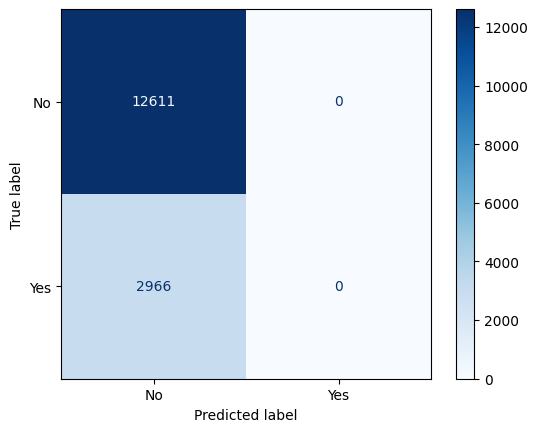

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Printar métricas

In [ ]:
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

          No       0.81      1.00      0.89     12611
         Yes       0.00      0.00      0.00      2966

    accuracy                           0.81     15577
   macro avg       0.40      0.50      0.45     15577
weighted avg       0.66      0.81      0.72     15577



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#**Modelagem dos Dados - Tunning**

Definir variáveis X e y para o modelo

In [ ]:
X = df[['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected', 'Gender', 'Subscription_type', 'Age']]
y = df['Churned']

Separar em train e test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Realizar o .fit do modelo

In [ ]:
numeric_features = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected', 'Age']
categorical_features = ['Gender', 'Subscription_type']

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear']
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Time_on_platform',
                                                                          'Num_streaming_services',
                                                                          'Avg_rating',
                                                                          'Devices_connected',
                                                                          'Age']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Subscription_type'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             verbose=1)

Realizar a modelagem

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Melhores parâmetros encontrados: {best_params}')

Melhores parâmetros encontrados: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [ ]:
y_pred = best_model.predict(X_test)

Plotar matrix confusão

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])

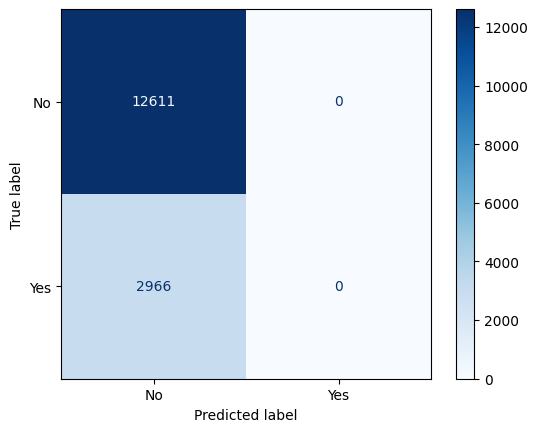

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Printar métricas

In [ ]:
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

          No       0.81      1.00      0.89     12611
         Yes       0.00      0.00      0.00      2966

    accuracy                           0.81     15577
   macro avg       0.40      0.50      0.45     15577
weighted avg       0.66      0.81      0.72     15577



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#**Modelagem dos Dados - Random Forest**

 Realizar a montagem do grid search

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
parametros = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy')

 Realizar o .fit do modelo

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
assert not np.isnan(X_train).any(), "X_train contains NaN values"
assert not np.isnan(y_train).any(), "y_train contains NaN values"

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (62307, 10)
Shape of y_train: (49019,)


In [ ]:
X_train = X_train[:49019, :]

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Realizar o Tunning

In [ ]:
print("Parâmetros do modelo:", modelo.get_params())

Parâmetros do modelo: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Realizar a modelagem

In [ ]:
label_encoder = LabelEncoder()
X_test['Subscription_type'] = label_encoder.fit_transform(X_test['Subscription_type'])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
imputer.fit(X_test)

SimpleImputer(strategy='most_frequent')

In [ ]:
X_test_imputed = imputer.transform(X_test)

In [ ]:
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [ ]:
label_encoder = LabelEncoder()
X_test_imputed['Subscription_type'] = label_encoder.fit_transform(X_test_imputed['Subscription_type'])

In [ ]:
y_pred = modelo.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Plotar matrix confusão

In [ ]:
y_pred = modelo.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [ ]:
y_pred = y_pred[:15577]

In [ ]:
y_test_cleaned = np.nan_to_num(y_test, nan=np.nanmedian(y_test))

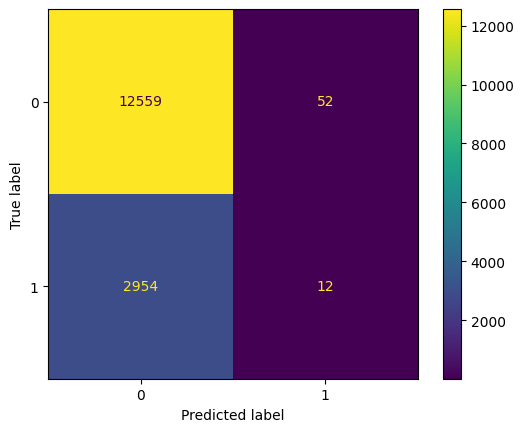

In [ ]:
cm = confusion_matrix(y_test_cleaned, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Printar métricas

In [ ]:
y_test = y_test.fillna(0)

In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.8070231751941965
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89     12611
         1.0       0.19      0.00      0.01      2966

    accuracy                           0.81     15577
   macro avg       0.50      0.50      0.45     15577
weighted avg       0.69      0.81      0.72     15577

